In [1]:
#Model Traning

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [15]:
df = pd.read_csv('Clean_Algerian_forest_fires_dataset_UPDATE.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Regine
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [16]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [17]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Regine
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    int64  
 11  Regine       243 non-null    int64  
dtypes: float64(7), int64(5)
memory usage: 22.9 KB


In [19]:
#Divided independent and dependent daatset
x = df.drop('FWI',axis=1)
y  =df['FWI']

In [20]:
x

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Regine
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [21]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [24]:
#divided into train and test dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [25]:
x_train.shape,x_test.shape

((194, 11), (49, 11))

In [26]:
y_train.shape,y_test.shape

((194,), (49,))

<AxesSubplot: >

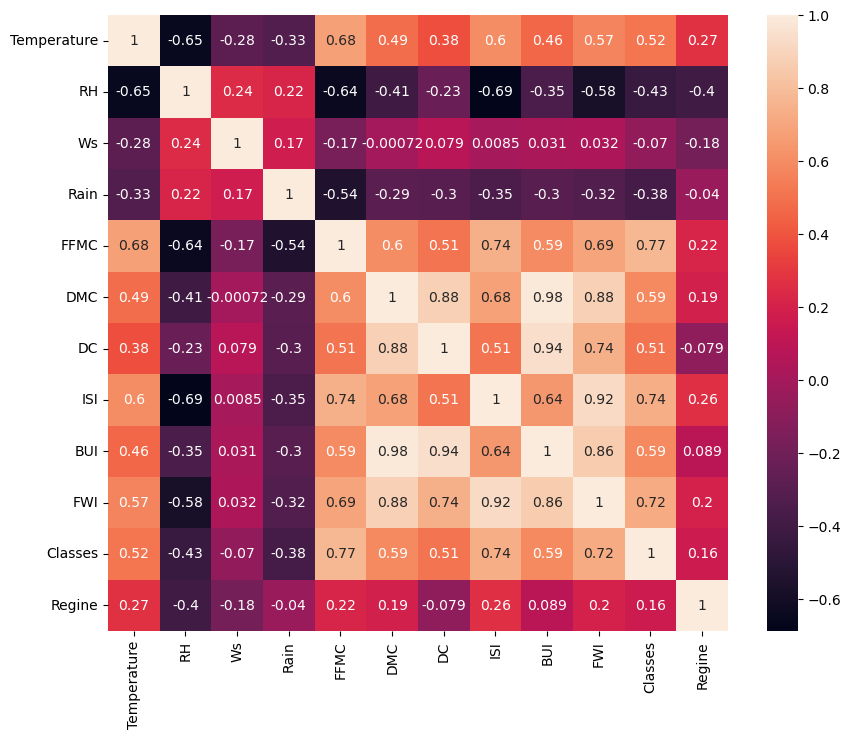

In [29]:
#check multicolinearity
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [30]:
def correlation(dataset,threshold):
    corr_col = set()
    corr_dataset = dataset.corr()
    
    for i in range(len(corr_dataset.columns)):
        for j in range(i):
            if abs(corr_dataset.iloc[i,j])>threshold:
                
                corr_name = corr_dataset.columns[i]
                corr_col.add(corr_name)
    return corr_col

In [33]:
col_name = correlation(x_train,0.85)

In [34]:
col_name

{'BUI', 'DC'}

In [35]:
x_train.drop(col_name,axis=1,inplace=True)
x_test.drop(col_name,axis=1,inplace=True)

In [38]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

<AxesSubplot: >

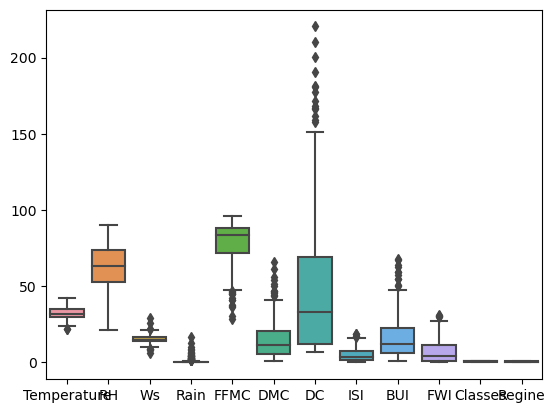

In [48]:
sns.boxplot(df)

<AxesSubplot: >

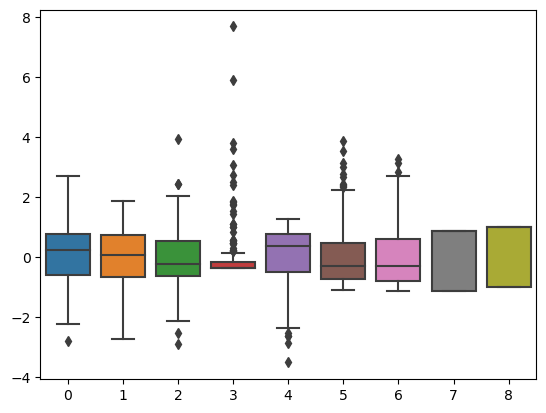

In [49]:
sns.boxplot(x_train_scale)

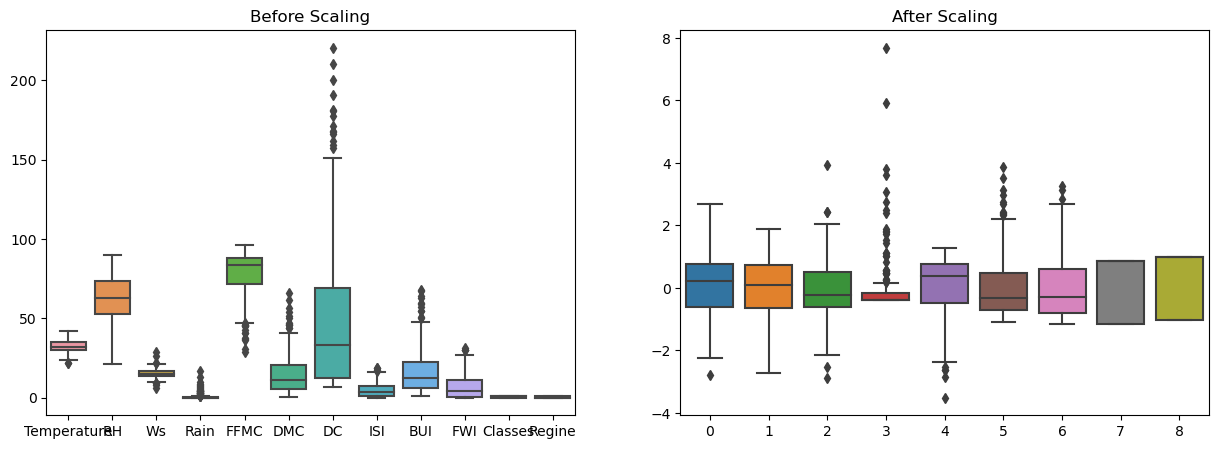

In [51]:
plt.subplots(figsize= (15,5))
plt.subplot(1,2,1)
sns.boxplot(df)
plt.title("Before Scaling")
plt.subplot(1,2,2)
sns.boxplot(x_train_scale)
plt.title("After Scaling")
plt.show()

In [37]:
#Model Traning

In [40]:
#Linear Regrassion

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

regrassor = LinearRegression()
regrassor.fit(x_train_scale,y_train)
y_pred = regrassor.predict(x_test_scale)


mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
score = r2_score(y_test,y_pred)
adjusted_score  = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

print("Mean Squre Error :",mse)
print("Mean Absolute Error :",mae)
print("Root Mean Squre Error :",rmse)
print("R Squred :",score)
print("Adjusted R Squred :",adjusted_score)

Mean Squre Error : 0.5882990110708681
Mean Absolute Error : 0.504997869416568
Root Mean Squre Error : 0.7670065260940536
R Squred : 0.9805895859259882
Adjusted R Squred : 0.9761102596012162


In [41]:
#Ridge Regrassion

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

ridge = Ridge()
ridge.fit(x_train_scale,y_train)
y_pred = ridge.predict(x_test_scale)


mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
score = r2_score(y_test,y_pred)
adjusted_score  = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

print("Mean Squre Error :",mse)
print("Mean Absolute Error :",mae)
print("Root Mean Squre Error :",rmse)
print("R Squred :",score)
print("Adjusted R Squred :",adjusted_score)

Mean Squre Error : 0.6029616070548641
Mean Absolute Error : 0.5192048325844797
Root Mean Squre Error : 0.7765060251246375
R Squred : 0.9801058063273599
Adjusted R Squred : 0.9755148385567506


In [42]:
#Linear Regrassion

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

lasso = Lasso()
lasso.fit(x_train_scale,y_train)
y_pred = lasso.predict(x_test_scale)


mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
score = r2_score(y_test,y_pred)
adjusted_score  = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

print("Mean Squre Error :",mse)
print("Mean Absolute Error :",mae)
print("Root Mean Squre Error :",rmse)
print("R Squred :",score)
print("Adjusted R Squred :",adjusted_score)

Mean Squre Error : 1.726042325023142
Mean Absolute Error : 1.0093958923873407
Root Mean Squre Error : 1.31378930008702
R Squred : 0.9430507350726562
Adjusted R Squred : 0.9299085970125


In [43]:
#Linear Regrassion

from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

elastic_net = ElasticNet()
elastic_net.fit(x_train_scale,y_train)
y_pred = elastic_net.predict(x_test_scale)


mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
score = r2_score(y_test,y_pred)
adjusted_score  = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

print("Mean Squre Error :",mse)
print("Mean Absolute Error :",mae)
print("Root Mean Squre Error :",rmse)
print("R Squred :",score)
print("Adjusted R Squred :",adjusted_score)

Mean Squre Error : 4.009921298441002
Mean Absolute Error : 1.6834416340136709
Root Mean Squre Error : 2.0024787885121285
R Squred : 0.8676961352267807
Adjusted R Squred : 0.8371644741252685


In [44]:
import pickle

pickle.dump(ridge,open('ridge.pkl','wb'))
pickle.dump(scaler,open('scaler.pkl','wb'))

ridge1 = pickle.load(open('ridge.pkl','rb'))
scaler1 = pickle.load(open('scaler.pkl','rb'))

In [45]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Regine
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [46]:
ridge1.predict(scaler1.transform([[29,57,18,0.0,65.7,3.4,1.3,0,0]]))

array([0.65462372])

In [47]:
ridge1.predict(scaler1.transform([[29,61,13,1.3,64.4,4.1,1.0,0,0]]))

array([0.51433653])